# Python for Data Science : Application of Exploratory Data Analysis (EDA) and K-Means Clustering

## A. Exploratory Data Analysis (EDA)

We'll conduct our analysis study case using the [HELP International](https://www.kaggle.com/datasets/gauravduttakiit/help-international?resource=download) dataset. Click the highlited to access the Kaggle dataset.

### 1. Business/Project Understanding

- **Organization Background**: HELP International is an international humanitarian NGO committed to fighting poverty and providing basic facilities and assistance to people in underdeveloped countries during disasters and natural disasters.

- **Problem**: About $10 million has been raised by HELP International. CEOs of NGOs must now choose how to strategically and profitably use this funding. Therefore, the CEO must decide which nations require the most assistance.

- **Objective**: To categorize countries using socio-economic and health factors to identify which countries need financial assistance the most.

---
---

### 2. Variable Description

After thoroughly understanding the business case, we must first identify our variables in the dataset. So, we have a clearer picture of what data we're dealing with.

- **country**: Name of the country
- **child_mort**: Death of children under five years of age per 1000 live births
- **exports**: Exports of goods and services per capita. As a percentage of the GDP per capita
- **health**: Total health spending per capita. As a percentage of GDP per capita
- **import**: Imports of goods and services per capita. As a percentage of the GDP per capita
- **income**: Net income per person
- **inflation**: The measurement of the annual growth rate of the Total GDP
- **life_expec**: The average number of years a newborn child would live if the current mortality patterns are to remain the same
- **total_fer**: The number of children that would be born to each woman if the current age-fertility rates stay the same.
- **gdpp**: The GDP per capita. Calculated as the total GDP divided by the total population.

---
---

### 3. Data Understanding

**Import Library**

After we clearly understand the business/project case, we can import the necessary data in CSV format. The required libraries must be imported.

In [166]:
import numpy as np #linear algebra
import pandas as pd #data manipulation and analysis

import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization

import sklearn.preprocessing as skp #machine learning (preprocessing)
import sklearn.cluster as skc #machine learning (clustering)

import warnings # ignore warnings
warnings.filterwarnings('ignore')

**Data Preview**

After importing some important libraries for this analysis, let's read our CSV file dataset as a Pandas data frame named 'df' and display the first ten rows of the dataset for preview.

In [167]:
df = pd.read_csv('Country-data.csv')
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


**Data Type**

Get information about the data sets' columns, data types, and non-null values using `df.info()`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We can see that the dataset consists of 167 observations across 10 variables. Therefore, it appears that the data frame has no missing values.

**Data Statistical Summary**

Display the statistics descriptive for the dataset using `df.describe()`.

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


---
---

### 4. Data Cleaning

Data cleaning is needed to find and take further action if any missing and duplicated values. This process aims to get our data ready to analyze and visualize.

**Missing Value**

We can use `isnull().sum()` function, to find the number of the missing values.

In [5]:
# Count missing value / N/A

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Fortunately, this dataset contains no missing values. We'll use visualization methods to look for trends and outliers in our collected data.

**Duplicated Value**

To find duplicated values, we can use the help of .duplicated() function.

In [6]:
df[df.duplicated(keep=False)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


As the above result, there are no duplicated values in our dataset.

---
---

### 5. Data Visualization

We knew what our dataset was about in general, and we checked the missing and duplicated values.

We will utilize the **seaborn** library to create statistical data graphs. Seaborn is a data visualization library based on **matplotlib** .

**Univariate Analysis**

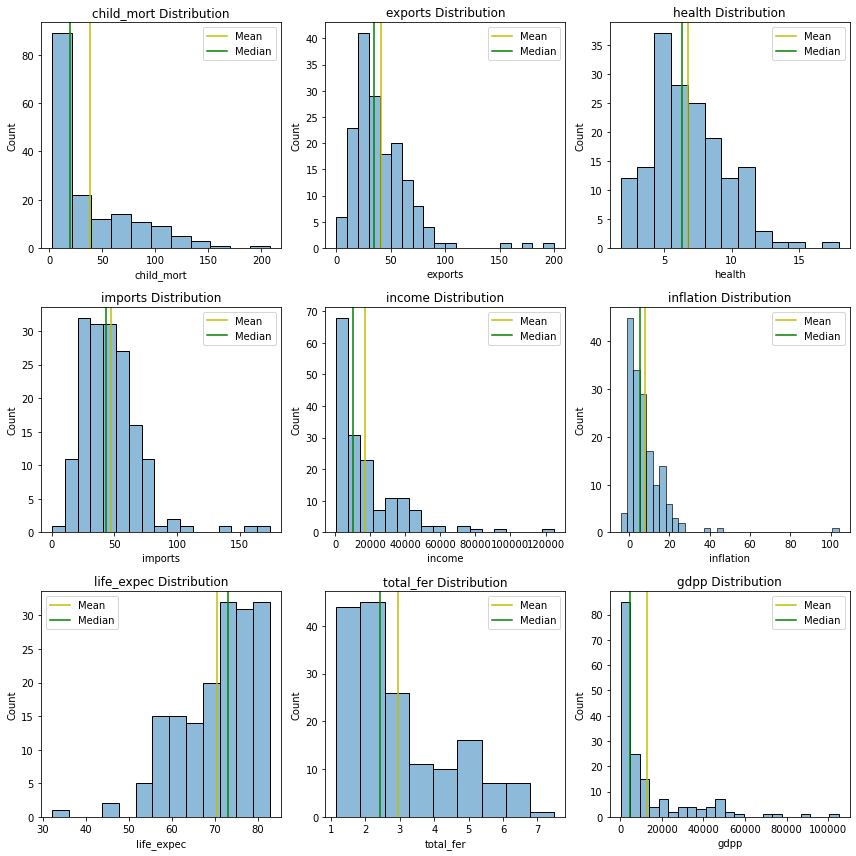

In [171]:
# Visualize the distribution of each variable using histogram.

plt.figure(figsize=(12,12))

for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.histplot(x=df[j], alpha=.5)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.axvline(df[j].mean(), label='Mean', color='y')
    plt.axvline(df[j].median(), label='Median', color='g')
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.legend()
    plt.tight_layout()
plt.savefig('hist.png')
plt.show()


As we can see from the above histogram of our dataset, we can gather some information below about our data distribution of each variable:
- **child_mort**: Have right-skewed distribution.
- **exports**: Have right-skewed distribution.
- **health**: Have right-skewed distribution.
- **import**: Have right-skewed distribution.
- **income**: Have right-skewed distribution.
- **inflation**: Have right-skewed distribution.
- **life_expec**: Have left-skewed distribution.
- **total_fer**: Have right-skewed distribution.
- **gdpp**: Have right-skewed distribution.

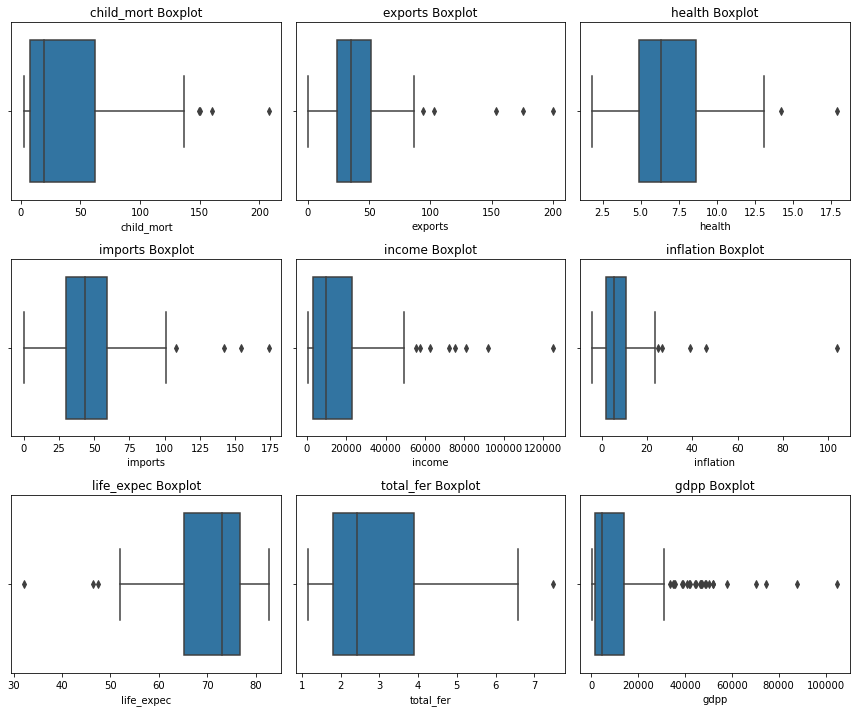

In [8]:
# Visualize the boxplot of each variable.

plt.figure(figsize=(12,10))

for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.savefig('box.png')
plt.show()

Since it reveals actual variations that exist in these countries, we will not currently delete the outliers. However, some are very high, while others are very low. Therefore, we must recheck outliers after choosing the best features we want to use for clustering.

The boxplot shows that the **GDP per capita (gdpp)** and **income** are the variables with the most outliers. Therefore, later we must evaluate which nations are qualified for financial aid based on the business case, considering each nation's economy and level of health.

**Bivaraite Analysis**

As we can see from the boxplot, the gdpp variable is similar to the income variable. Therefore, it is better to know how these two variables relate in a scatterplot.

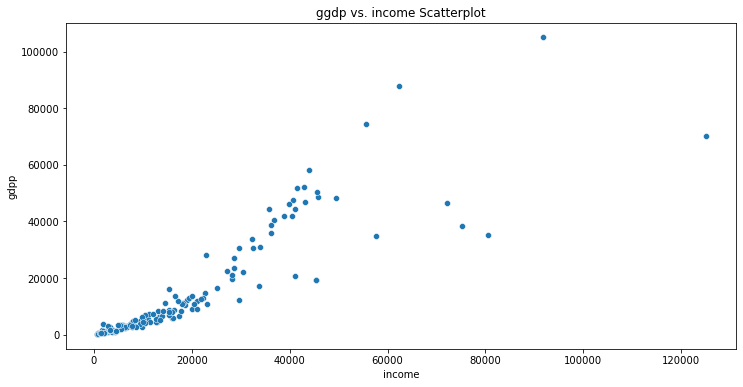

In [ ]:
fig = plt.figure(figsize=(12,6))

# m, b = np.polyfit(df.income, df.gdpp, 1)

sns.scatterplot(x=df.income, y=df.gdpp)
# plt.plot(df.income, m*df.income+b, color='red')
plt.title('ggdp vs. income Scatterplot')

plt.savefig('scatter.png', bbox_inches = 'tight')
plt.show()

As we can see from the above scatterplot, these two variables have a strong positive relationship. As income increases, ggdp also increases.

We can also use the `.corr()` function to show Pearson's correlation value (as the default method) between the two variables.

In [10]:
print('Correlation between ggdp and income is : {}'.format(round(df.corr()['income']['gdpp'],3)))

Correlation between ggdp and income is : 0.896


**Multivariate Analysis**

We can use .pairplot() to display a group of scatterplots of each variable in the dataset.

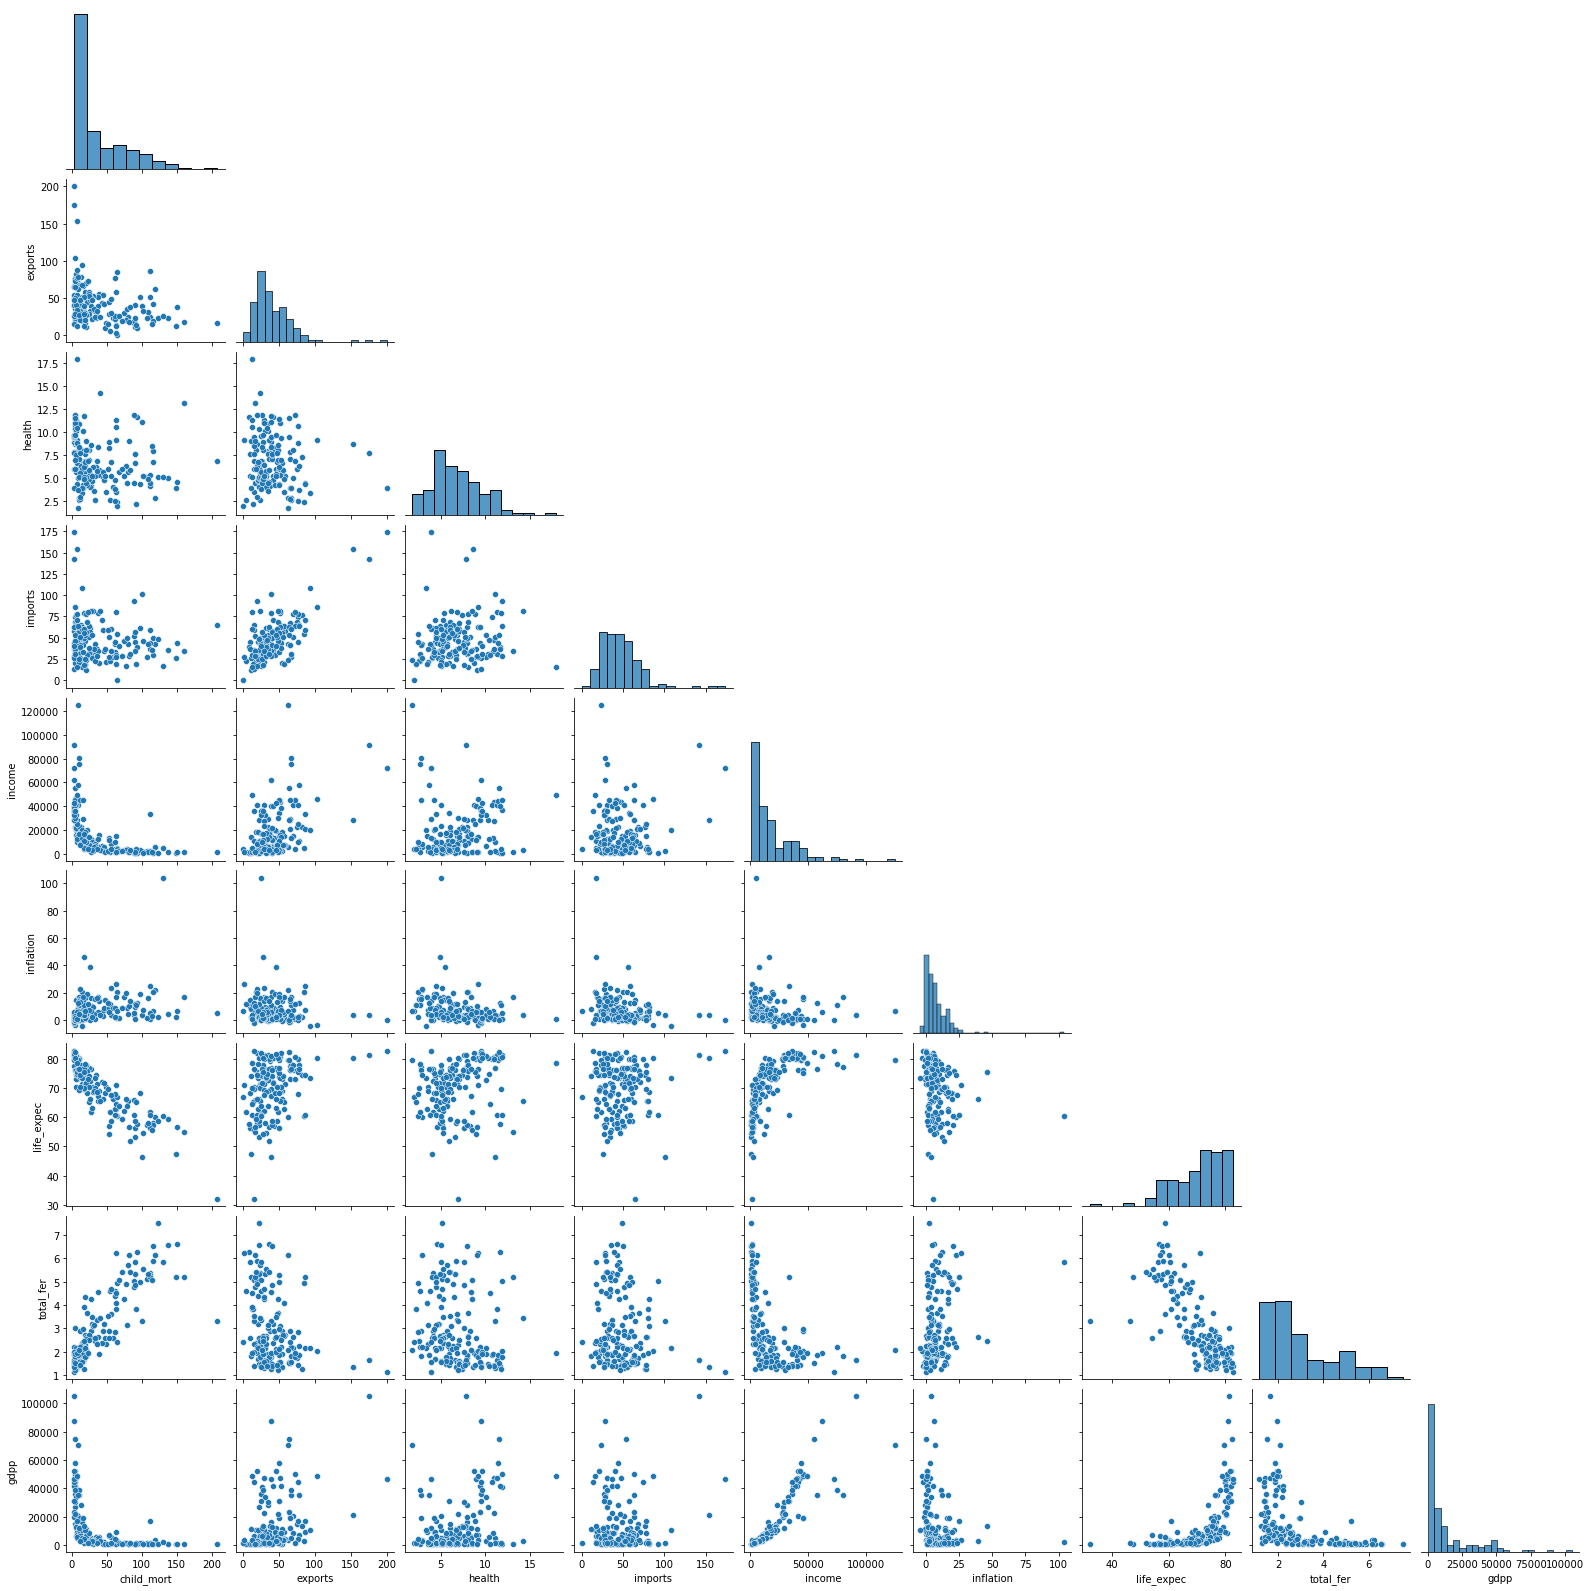

In [177]:
# Multivariate Analysis using Pairplot

pairplot = sns.pairplot(df, corner=True)
plt.show(pairplot)

Besides, we can use `.heatmap()` function combined with the `.corr()` function to display the relationship between each variable in the dataset based on the correlation coefficient.

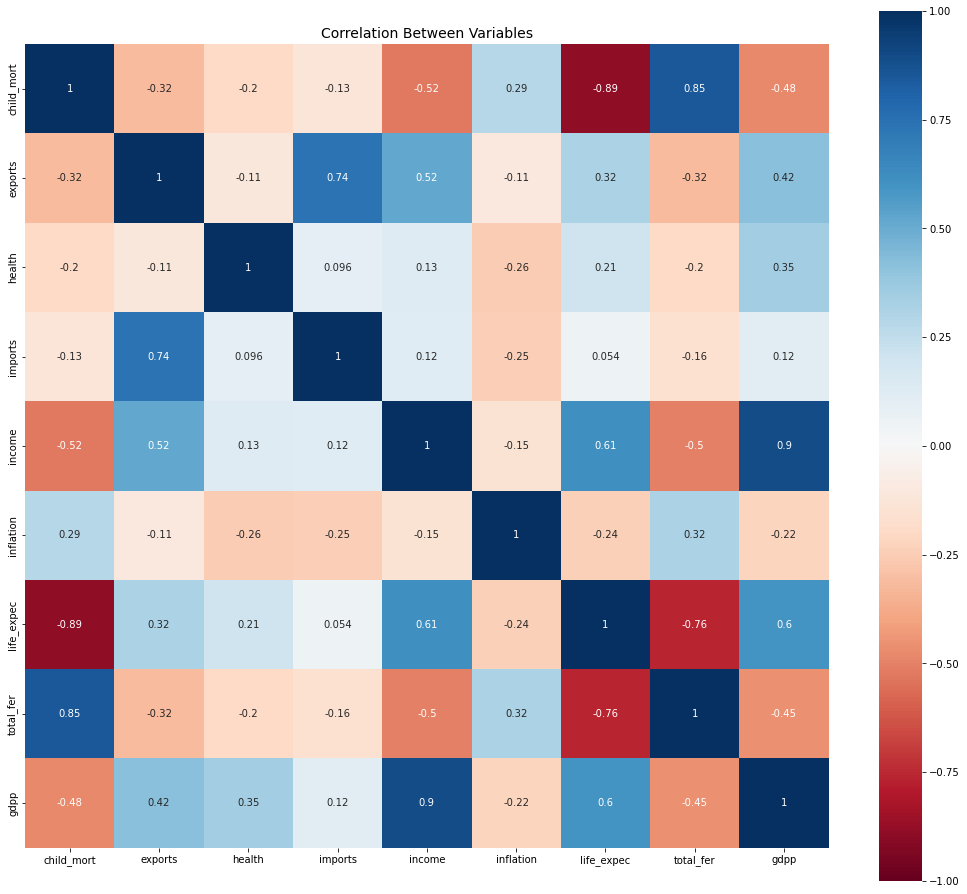

In [176]:
# Multivariate Analysis using Heatmap

correlation_metrics=df.corr()
fig = plt.figure(figsize=(18,16))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.savefig('heatmap.png')
plt.show()

From the above showed heatmap, we can list our findings of the correlations between two variables from our dataset below:

- income & gdpp (very strong positive correlation)
- life_expec & total_fer (strong negative correlation)
- total_fer & child_mort (strong positive correlation) 
- life_expec & child_mort (strong negative correlation)
- exports & imports (strong positive correlation)
- life_expec & gdpp (moderate positive correlation)
- life_expec & income (moderate positive correlation)
- income & child_mort (moderate negative correlation)
- income & export (moderate positive correlation)

---
---

### 6. Feature Selection

To determine the best features, we need to review the purpose of this project. This project aims "to categorize countries using socio-economic and health factors to identify which countries need financial aidthe most".

**Income** and **GDP per Capita (gdpp)** are the best features to represent a country's socio-economic factors. But, we consider using only the **income** variable to represent the socio-economic factors because the income and gdpp variable strongly correlate. Therefore, we surely don't want to give financial aid to a country with a high income.

Let's find the best fit variable that can be a feature to represent a health factor of a country and have a correlation with the income.

As we can see from the correlation heatmap of our dataset, the income variable has medium correlations with the child_mort, exports, and life_expect. Therefore, for this analysis, we will use the **child_mort** variable as the feature that will represent the health factor of a country.

So, we will proceed by using **income** and **child_mort** variables as our feature for clustering.

**Features Outliers Handling**

To reduce the number of countries we select, we can filter to countries with an income below the median income to ensure that the company gives financial aid to the country that needs it the most. The median is used because the data distribution of income variable have a skewed shape, so it is wise to use the median value rather than the mean.

In [13]:
df_filter_income = df[df.income < df.income.median()]
df_filter_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Now with only simple filtering above, we can reduce our selection by almost 50%. After filtering, let's display the histogram and boxplot of income and child_mort variable.

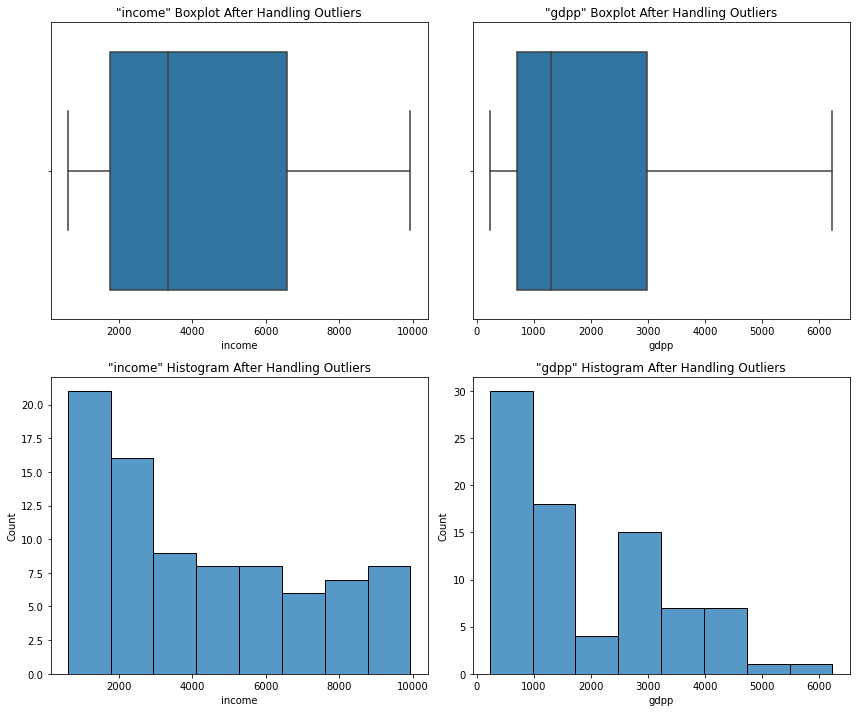

In [14]:
fig = plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(x=df_filter_income["income"])
plt.title('"income" Boxplot After Handling Outliers')
plt.tight_layout()

plt.subplot(2,2,2)
sns.boxplot(x=df_filter_income["gdpp"])
plt.title('"gdpp" Boxplot After Handling Outliers')
plt.tight_layout()

plt.subplot(2,2,3)
sns.histplot(x=df_filter_income["income"])
plt.title('"income" Histogram After Handling Outliers')
plt.tight_layout()

plt.subplot(2,2,4)
sns.histplot(x=df_filter_income["gdpp"])
plt.title('"gdpp" Histogram After Handling Outliers')
plt.tight_layout()

plt.savefig('after_filter.png')
plt.show()

Based on the above charts, we can confidently proceed to the next step for clustering because the charts show no outliers, which indicates our dataset is now cleaner than before.

Before we do the clustering, let's see our chosen features' correlation using a scatterplot and `.hexbin()` function from the matplotlib library.

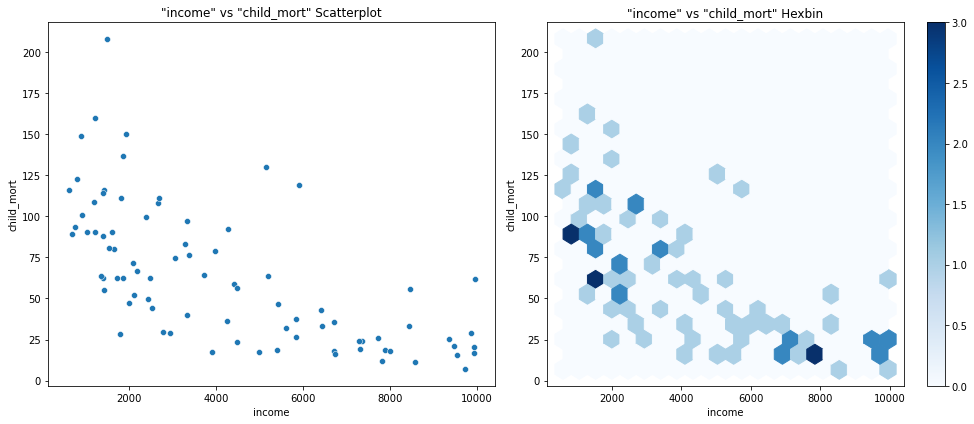

In [15]:
fig = plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x=df_filter_income["income"], y=df_filter_income["child_mort"])
plt.title('"income" vs "child_mort" Scatterplot')
plt.tight_layout()

plt.subplot(1,2,2)
hb = plt.hexbin(x=df_filter_income["income"], y=df_filter_income["child_mort"], gridsize = 20, cmap ='Blues') 
cb = plt.colorbar(hb) 
plt.title('"income" vs "child_mort" Hexbin')
plt.xlabel('income')
plt.ylabel('child_mort')
plt.tight_layout()


plt.savefig('bivariate_filter.png')
plt.show()

The above scatterplot shows that **income** and **child_mort" variables have a moderate negative correlation. And the hexbin shows that some countries are highly concentrated in some points.

---
---
---
---

## B. K-Means Clustering

Clustering is part of an unsupervised algorithm in Machine Learning, meaning no training process is involved. Instead, organizing data into groups with related characteristics and categorizing them is the goal of clustering.

K-Means clustering, Mean-Shift Clustering, DBSCAN, Expectation–Maximization (EM) Clustering, and Agglomerative Hierarchical Clustering are some clustering algorithms that can be used. On the other hand, **K-Means** is the most widely used and taught due to its simplicity in implementation and understanding.

### 1. Feature Scaling

Before we conduct the scaling, let's create a new data frame consisting of the selected column for the scaling process.

In [16]:
# Create new data frame for Clustering

df_cluster = df_filter_income[['country', 'income', 'child_mort']].reset_index()
df_cluster.drop('index', inplace=True, axis=1)

display(df_cluster)

,country,income,child_mort
0,Afghanistan,1610,90.2
1,Albania,9930,16.6
2,Angola,5900,119.0
3,Armenia,6700,18.1
4,Bangladesh,2440,49.4
...,...,...,...
78,Uzbekistan,4240,36.3
79,Vanuatu,2950,29.2
80,Vietnam,4490,23.3
81,Yemen,4480,56.3


Now, we can start the scaling using `StandardScaler()` from the scikit-learn library.

In [17]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()

data_scale = np.array(df_cluster[['income', 'child_mort']])
scaled = sc.fit_transform(data_scale.astype(float))
scaled_df = pd.DataFrame(scaled, columns=['income', 'child_mort'])

display(scaled_df)

,income,child_mort
0,-0.920666,0.640089
1,1.977480,-1.132268
2,0.573691,1.333620
3,0.852359,-1.096147
4,-0.631548,-0.342414
...,...,...
78,-0.004545,-0.657874
79,-0.453897,-0.828848
80,0.082539,-0.970926
81,0.079055,-0.176255


Then, we need to check our scaled features' correlation by visualizing them to ensure we do the scaling correctly.

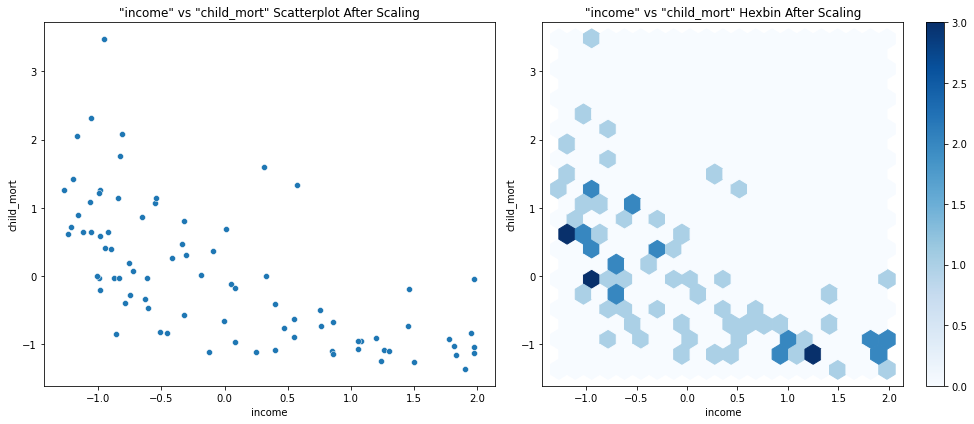

In [18]:
fig = plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x=scaled_df["income"], y=scaled_df["child_mort"])
plt.title('"income" vs "child_mort" Scatterplot After Scaling')
plt.tight_layout()

plt.subplot(1,2,2)
hb = plt.hexbin(x=scaled_df["income"], y=scaled_df["child_mort"], gridsize = 20, cmap ='Blues') 
cb = plt.colorbar(hb) 
plt.title('"income" vs "child_mort" Hexbin After Scaling')
plt.xlabel('income')
plt.ylabel('child_mort')
plt.tight_layout()


plt.savefig('bivariate_filter_scaled.png')
plt.show()

There is no difference in the correlation shown before scaling, and after scaling, it seems that we are doing the scaling correctly.

---
---

### 2. Number of Cluster

Determining the optimal number of clusters into which data can be clustered is a fundamental step for any unsupervised algorithm. The **Elbow Method** is one of the most widely used approaches for determining the optimal value of "K".

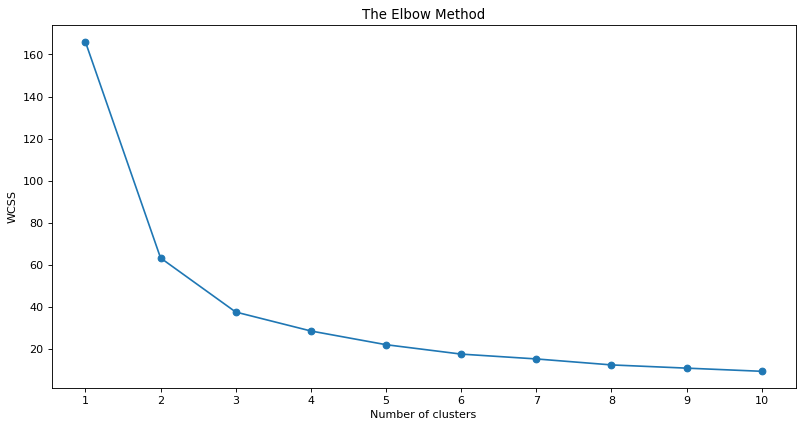

In [ ]:
###Decide n-cluster using Elbow Method

wcss=[]

k_range = range(1,11)

for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 6), dpi=80)

plt.plot(k_range, wcss, marker='o')


# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.savefig('num_clust.png')
plt.show()

From the elbow curve, we can see that 3 clusters will be the best option to continue the clustering.

If we hesitate to determine the K value from the elbow method graph, we can use a help of a function called KneeLocater from the kneed library.

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

print('The elbow located is : {}'.format(kl.elbow))

The elbow located is : 3


The output of the code above is 3. So it is the same K values as our choice from the elbow graph.

---
---

### 3. Clustering (Using chosen K values)

After we have the number of clusters that fits the features, we will conduct the clustering using the `KMeans()` function from the scikit-learn library.

In [ ]:
# Clustering K Means, K=3

kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_df)
kmeans_3.labels_

array([2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0])

The output of the clustering is an array. To make it easier to work with the actual data, we can assign these labels to the data frame we have prepared before for clustering.

In [180]:
# Assign clustering result to each country in the data frame

df_cluster['cluster_id'] = kmeans_3.labels_

display(df_cluster)

,country,income,child_mort,cluster_id
0,Afghanistan,1610,90.2,2
1,Albania,9930,16.6,1
2,Angola,5900,119.0,2
3,Armenia,6700,18.1,1
4,Bangladesh,2440,49.4,0
...,...,...,...,...
78,Uzbekistan,4240,36.3,0
79,Vanuatu,2950,29.2,0
80,Vietnam,4490,23.3,0
81,Yemen,4480,56.3,0


We can count the number of countries in each cluster by using `value_counts()` function.

In [26]:
## Number of countries in each cluster
df_cluster.cluster_id.value_counts(ascending=True)

2    24
1    28
0    31
Name: cluster_id, dtype: int64

It seems there is a similar number of countries in each cluster. To understand the clustering result, we should plot it to a scatterplot.

**Plot the Clustering Result**

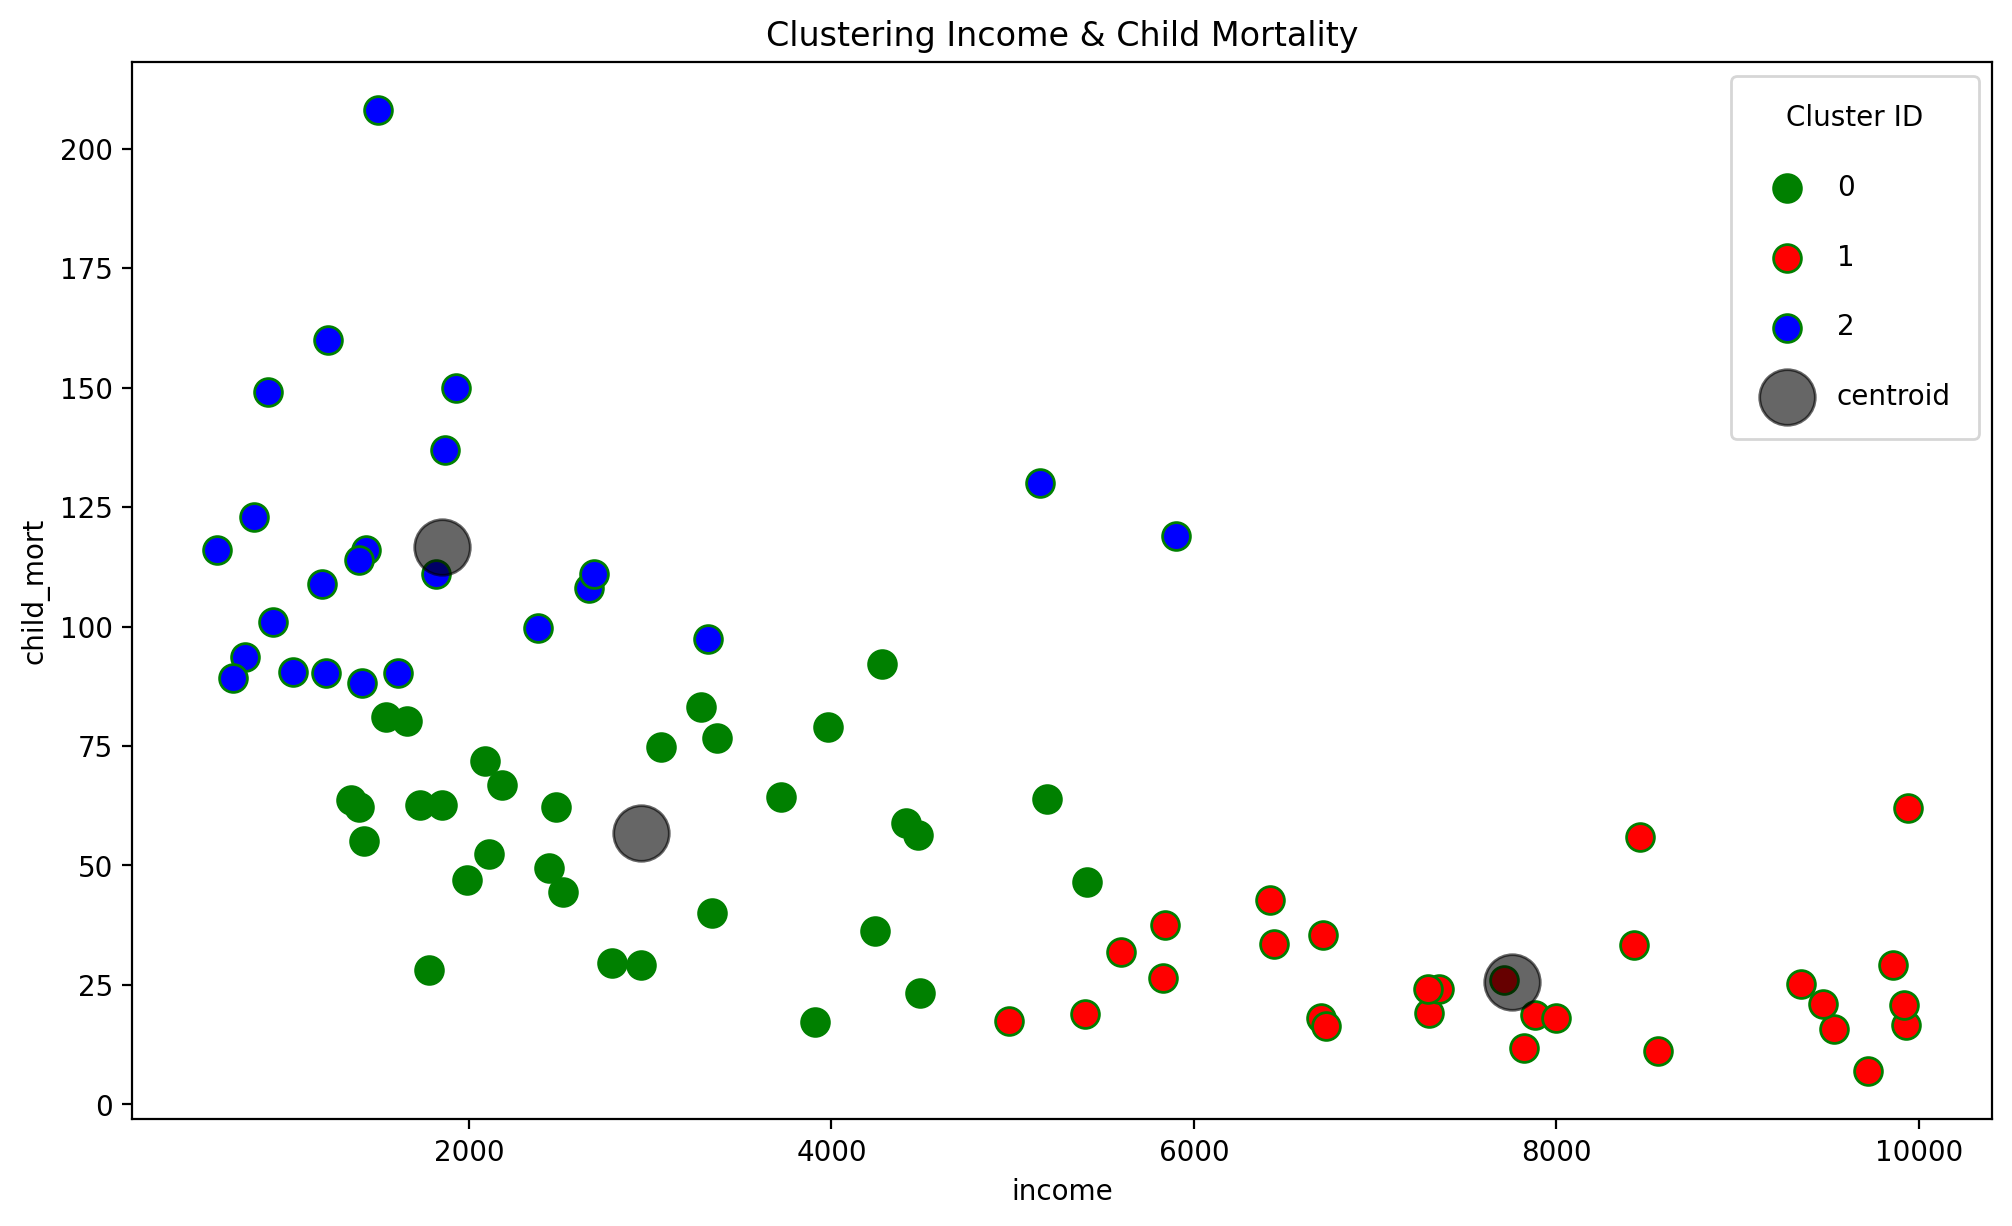

In [74]:
# Centroid Inverse Scaling

centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_) 

# Plot Clustering Result

fig, ax = plt.subplots(figsize=(12, 7), dpi=200)

plt.scatter(df_cluster.income[df_cluster.cluster_id == 0], df_cluster['child_mort'][df_cluster.cluster_id == 0], color = 'green', s=100, edgecolor = 'green', label= '0')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 1], df_cluster['child_mort'][df_cluster.cluster_id == 1], color = 'red', s=100, edgecolor = 'green', label = '1')
plt.scatter(df_cluster.income[df_cluster.cluster_id == 2], df_cluster['child_mort'][df_cluster.cluster_id == 2], color = 'blue', s=100, edgecolor = 'green', label = '2')

ax.scatter(centroids_ori_scale[:, 0], centroids_ori_scale[:,1], c='black', s=400, marker='o', alpha=0.6, label = 'centroid')

plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
plt.xlabel('income')
plt.ylabel('child_mort')
plt.title("Clustering Income & Child Mortality")

plt.savefig('cluster_result.png')
plt.show()

---
---

## 4. Recommendation

According to the above scatterplot, the blue clusters (Cluster 2) are the most deserving of financial aid based on the results of the clustering. Where the net income per person is below 6000 and the death of children under 5 years of age per 1000 live births is above 85 children.

Let's display the data frame of the 2nd cluster.

In [79]:
#Display 2nd Cluster

df_cluster2 = df_cluster[df_cluster.cluster_id == 2]
display(df_cluster2)

,country,income,child_mort,cluster_id
0,Afghanistan,1610,90.2,2
2,Angola,5900,119.0,2
6,Benin,1820,111.0,2
10,Burkina Faso,1430,116.0,2
11,Burundi,764,93.6,2
13,Cameroon,2660,108.0,2
15,Central African Republic,888,149.0,2
16,Chad,1930,150.0,2
18,Comoros,1410,88.2,2
19,"Congo, Dem. Rep.",609,116.0,2


There are still many countries in this cluster. Therefore, we should do further analysis to find the most suitable country to give financial aid to.

First, we can sort and visualize the ten lowest income countries from cluster 2.

**Sort by Lowest Income**

In [161]:
# Sort by lowest income

df_clust2_low_income = df_cluster2.sort_values('income').head(10).reset_index().drop('index', axis=1, inplace=False)
display(df_clust2_low_income)

,country,income,child_mort,cluster_id
0,"Congo, Dem. Rep.",609,116.0,2
1,Liberia,700,89.3,2
2,Burundi,764,93.6,2
3,Niger,814,123.0,2
4,Central African Republic,888,149.0,2
5,Mozambique,918,101.0,2
6,Malawi,1030,90.5,2
7,Guinea,1190,109.0,2
8,Togo,1210,90.3,2
9,Sierra Leone,1220,160.0,2


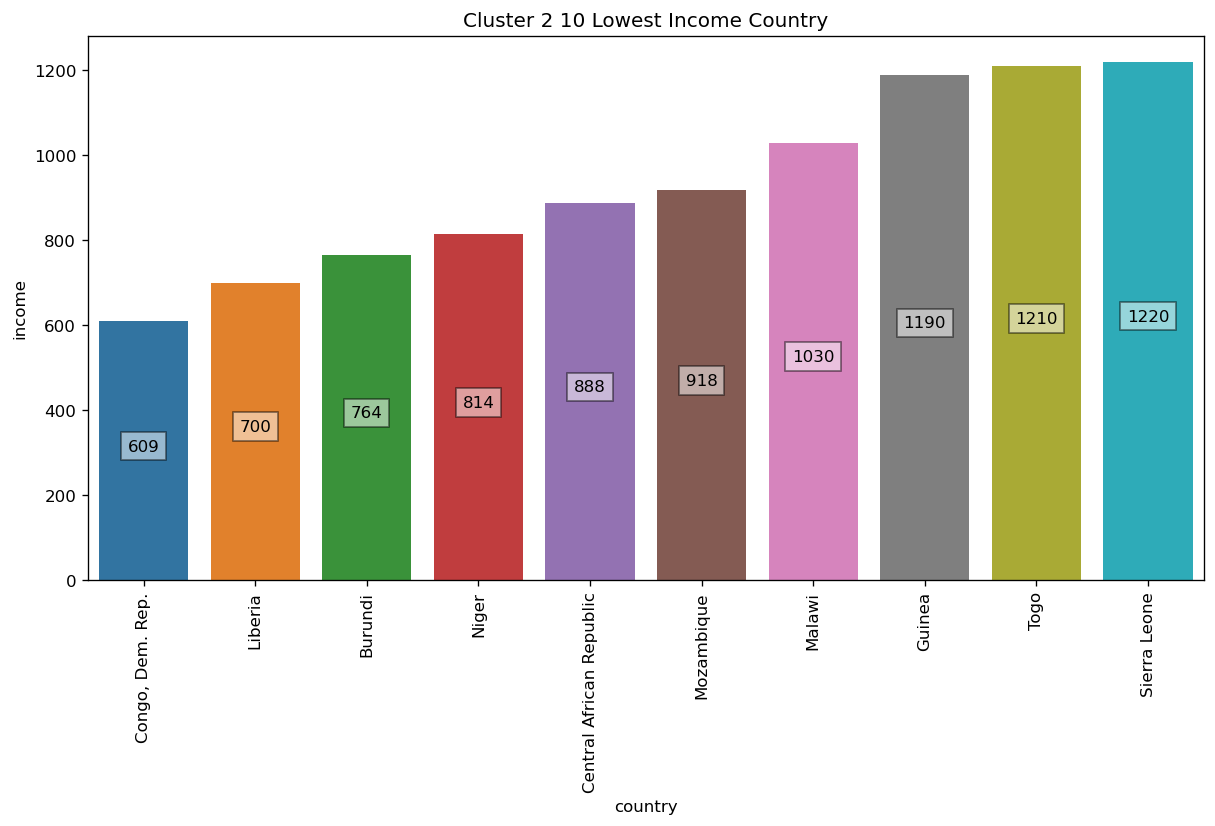

In [162]:
# Visualize the sorted countries in a bar chart

x = df_clust2_low_income.country.tolist()
y= df_clust2_low_income.income.tolist()

fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
sns.barplot(x=df_clust2_low_income.country, y=df_clust2_low_income.income)
ax.set_xticklabels(df_clust2_low_income.country, rotation = 90)

for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))
        
plt.title('Cluster 2 10 Lowest Income Country')

plt.savefig('cluster2_income_low.png', bbox_inches = 'tight')
plt.show()

Then we also need to sort and visualize the ten highest child_mort countries from cluster 2.

**Sort by Highest Child Mortality**

In [163]:
# Sort by highest child_mort

df_clust2_high_child_mort = df_cluster2.sort_values('child_mort', ascending=False).head(10).reset_index().drop('index', axis=1, inplace=False)

display(df_clust2_high_child_mort)

,country,income,child_mort,cluster_id
0,Haiti,1500,208.0,2
1,Sierra Leone,1220,160.0,2
2,Chad,1930,150.0,2
3,Central African Republic,888,149.0,2
4,Mali,1870,137.0,2
5,Nigeria,5150,130.0,2
6,Niger,814,123.0,2
7,Angola,5900,119.0,2
8,Burkina Faso,1430,116.0,2
9,"Congo, Dem. Rep.",609,116.0,2


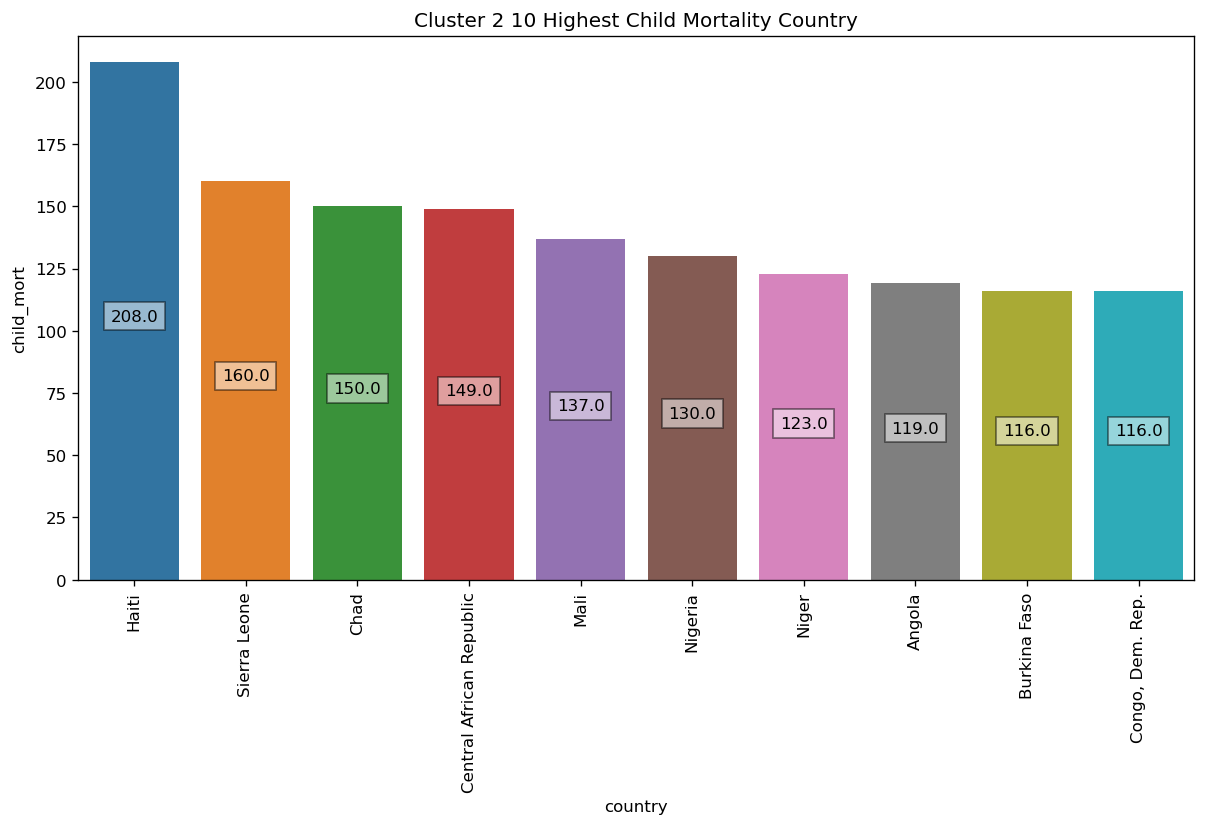

In [164]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)

x = df_clust2_high_child_mort.country.tolist()
y = df_clust2_high_child_mort.child_mort.tolist()

df_cluster2_sort_child_mort = df_cluster2.sort_values('child_mort', ascending=False).head(10)
sns.barplot(x=df_clust2_high_child_mort.country, y=df_clust2_high_child_mort.child_mort)
ax.set_xticklabels(df_clust2_high_child_mort.country, rotation = 90)

for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))
        
plt.title('Cluster 2 10 Highest Child Mortality Country')

plt.savefig('cluster2_child_high.png', bbox_inches = 'tight')
plt.show()

As the sorted charts above, we can take a list of some of the most suitable countries to give financial aid to. Here is the list of the countries:

- **Congo**: The lowest income country and the 10th highest child mortality value country in cluster 2.
- **Haiti**: The highest child mortality value country in cluster 2.
- **Niger**: The 4th lowest income and the 7th highest child mortality value country in cluster 2.
- **Central African Republic**: The 5th lowest income and the 4th highest child mortality value country in cluster 2.
- **Sierra Leone**: The 2nd highest child mortality value and the 10th lowest income country in cluster 2.

---
---
---
---

## C. Conclusion

After conducting some analysis of the given data set, in accordance with the business or project understanding that we should recommend which countries are most in need of financial assistance based on the socio-economic and health factors of the country, we found a final list of suitable countries for assistance using the k -means clustering method.
Here is the list of the countries that we would recommend:

- **Congo**
- **Haiti**
- **Niger**
- **Central African Republic**
- **Sierra Leone**

---
---

**Thanks for reading!**

Lets get connected in [Linkedin](https://www.linkedin.com/in/calvin-aziszam-sihmanto/)